+ ### Draw anomaly score according to time

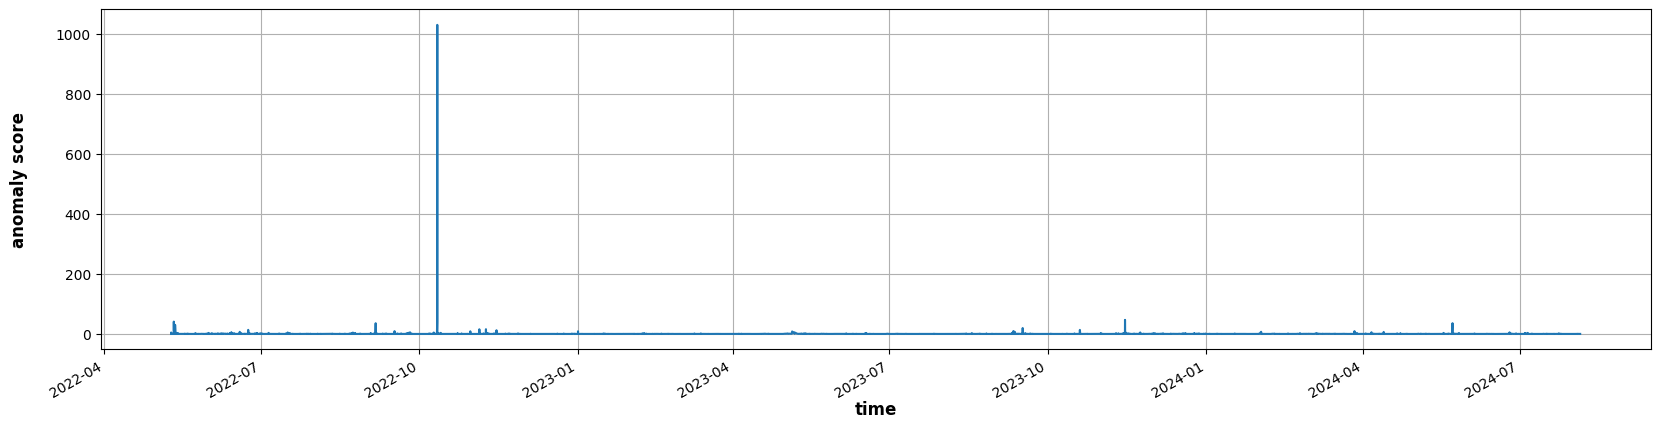

In [17]:
import numpy as np
import pandas as pd

# score = np.load('final/anomaly_score.npy')
score = np.load('final/anomaly_score.npy')
data = pd.read_csv('./final/data.csv')
data['Hour'] = pd.to_datetime(data['Hour'])

# 获取时间列作为索引
x = data['Hour'].dt.to_pydatetime().tolist()
x = x[6648:6648+5880]
# score = np.sqrt(score)

# 8111
anomaly = pd.DataFrame({'score' : score}, index=x)
# 8111
# anomaly = pd.DataFrame({'score' : score}, index=x)
# anomaly['score'] = np.log(anomaly['score'])
axes = anomaly.plot(figsize=(20,5), grid=True, legend=None)

axes.set_title("")
# Set x-axis label0.


axes.set_xlabel("time", labelpad=0, weight='bold', size=12)

# Set y-axis label
axes.set_ylabel("anomaly score", labelpad=20, weight='bold', size=12)

axes.figure.savefig('anomaly score_paper.png', dpi=600)



+ ### Draw histogram of anomaly score

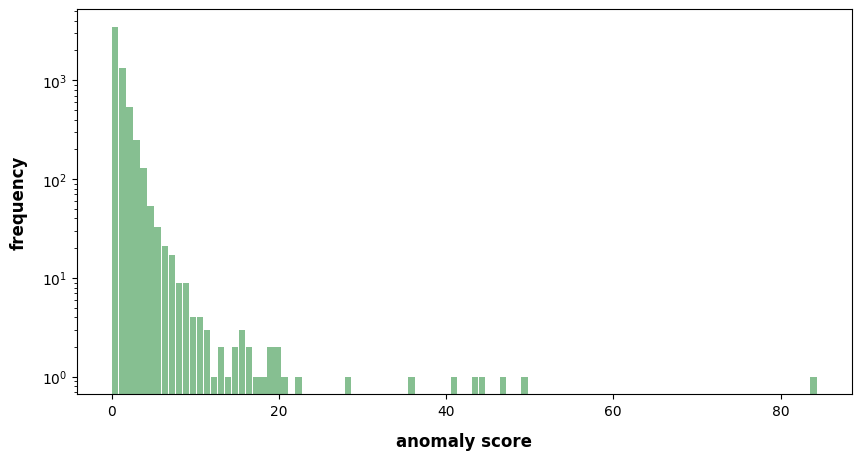

In [11]:
ax = anomaly.hist(column='score', bins=100, grid=False, figsize=(10,5), color='#86bf91', zorder=2, rwidth=0.9, log=True)

ax = ax[0]
for x in ax:

    # Remove title
    x.set_title("")

    # Set x-axis label
    x.set_xlabel("anomaly score", labelpad=10, weight='bold', size=12)

    # Set y-axis label
    x.set_ylabel("frequency", labelpad=10, weight='bold', size=12)
    
    x.figure.savefig('histogram.png', dpi=900)


+ ### Show largest anomaly scores

In [18]:
anomaly.nlargest(10, columns='score')
# print(anomaly.nlargest(10, columns='score'))
# top_anomalies = anomaly.nlargest(10, columns='score')
# 
# # 输出原始数据的行索引
# print("原始数据中最大的10个异常分数的索引:")
# print(top_anomalies.index)

,score
2022-10-11 13:00:00,1029.609171
2022-10-11 12:00:00,784.415489
2023-11-14 21:00:00,46.893810
2022-05-11 13:00:00,41.053026
2022-10-11 11:00:00,40.035143
2024-05-23 01:00:00,35.892548
2022-09-05 18:00:00,35.756439
2022-05-12 07:00:00,30.301448
2023-09-16 11:00:00,19.720370
2022-11-08 19:00:00,15.794995


+ ### Get 0.999-quantile (base for deciding threshold value)

In [19]:
anomaly.quantile(0.999, interpolation='nearest')

score    35.756439
Name: 0.999, dtype: float64